In [32]:
Мини-проект по статистике "Проверка гипотез"

In [ ]:
Описание данных
ad_id – идентификатор объявления (рекламы)
xyz_campaign_id – идентификатор рекламной кампании в базе компании X
fb_campaign_id – идентификатор кампании в Facebook
age – возрастная группа, которой показывалась реклама
gender – пол тех, кому показывалась реклама
interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
impressions – число показов
clicks – число кликов
spent – сумма, которую компания потратила на показ объявления 
total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# импортируем библиотеки

In [44]:
conversion = pd.read_csv('conversion.csv') # читаем файл с данными 
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


In [4]:
conversion.isna().sum() #проверяем количество пустых значений, чтобы если что их убрать

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
conversion.xyz_campaign_id.nunique() # считаем кол-во уникальных рекламных компаний

3

In [6]:
conversion.dtypes # проверяем типы значений в колонках, перед тем как делать расчеты, 
# чтобы предотвратить ошибки 

ad_id                    int64
xyz_campaign_id          int64
fb_campaign_id           int64
age                     object
gender                  object
interest                 int64
Impressions              int64
Clicks                   int64
Spent                  float64
Total_Conversion         int64
Approved_Conversion      int64
dtype: object

In [7]:
conversion1 = conversion.groupby('fb_campaign_id', as_index= False).Impressions.sum() 

In [8]:
conversion1 # подгтовили данные для графика распределения числа показов согласно заданию для fb_campaign_id

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


In [9]:
conversion1 = np.log(conversion1) # прологарифмировали значения, чтобы устранить ассиметрию в распределении,
# а так же чтобы выбросы стали еще более явными 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


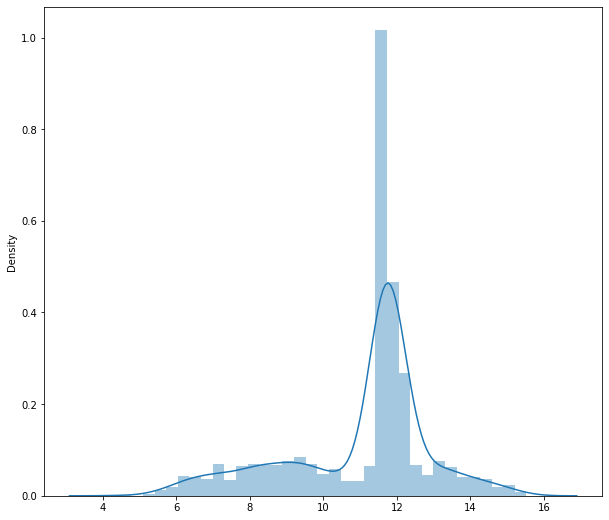

In [10]:
plt.figure(figsize=(10,9)) 


sns.distplot( conversion1) #строим график распределения

In [45]:
conversion = conversion.assign(CTR = conversion.Clicks/conversion.Impressions) # добавляем CTR в общий датафрейм

In [46]:
conversion # здесь мы посчитали CTR (click-through rate), которая показывает кликабельность, 
# т.е. отношение числа кликов к количеству показов)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


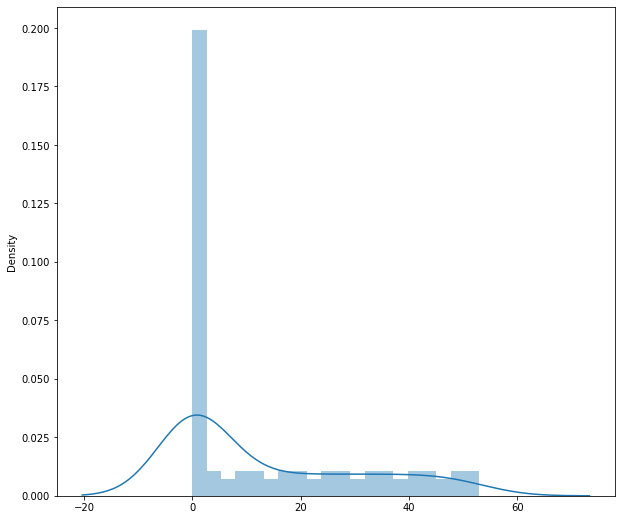

In [37]:
plt.figure(figsize=(10,9)) 

sns.distplot(conversion2, bins= 20)

In [48]:
conversion = conversion.assign(CPC = conversion.Spent / conversion.Clicks).dropna()
conversion # cost-per-click) – стоимость за клик пользователя по объявлению. 
# Рассчитывается путём деления суммы потраченных денег на общее число кликов

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,0.000192,1.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926


In [49]:
conversion.describe() # выводим описательные расчеты 

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
count,9.360000e+02,936.000000,936.000000,936.000000,9.360000e+02,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,1.023657e+06,1093.741453,137593.010684,34.210470,2.275064e+05,40.774573,62.719263,3.260684,1.071581,0.000201,1.499347
std,1.891542e+05,116.195656,20349.163125,28.622745,3.320917e+05,60.431102,92.260964,4.861548,1.880438,0.000094,0.232879
min,7.087460e+05,916.000000,103916.000000,2.000000,9.440000e+02,1.000000,0.180000,0.000000,0.000000,0.000031,0.180000
25%,7.803218e+05,936.000000,116183.000000,16.000000,1.907125e+04,3.000000,4.615000,1.000000,0.000000,0.000137,1.390000
50%,1.121376e+06,1178.000000,144586.000000,25.000000,9.833600e+04,16.000000,24.895000,1.000000,1.000000,0.000182,1.498273
75%,1.121902e+06,1178.000000,144674.000000,31.000000,2.829668e+05,50.000000,76.700000,3.000000,1.000000,0.000247,1.644364
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000,0.001059,2.212000


In [50]:
import scipy.stats as ss # импортируем библиотеку scipy модуль stats для расчета межквартильного размаха

In [52]:
round(ss.iqr(conversion.CPC), 2) 

0.25

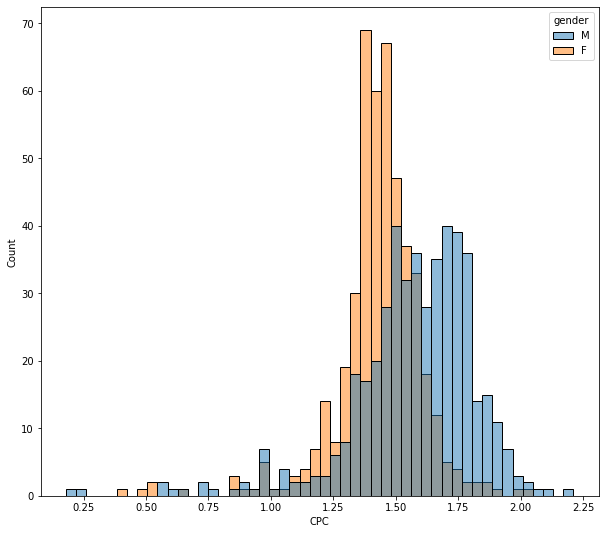

In [76]:
plt.figure(figsize=(10,9)) # визуализируем CPC с разбивкой по полу пользователей, которым были показаны объявления


sns.histplot(data = conversion, hue = 'gender', x = 'CPC', bins = 50) 


In [81]:
conversion = conversion.assign(CR = conversion.Approved_Conversion / conversion.Clicks )
conversion # conversion rate - отношение числа пользователей, совершивших целевое действие на определенном этапе,
# к общему числу тех, кто дошел до данного этапа, добаляем метрику в общий датафрейм

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CR
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,1.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,1.000000
6,708889,916,103940,30-34,M,15,15615,3,4.770000,1,0,0.000192,1.590000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.007937
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2,0.000171,1.471926,0.014815
